In [1]:
import os
import torch
import numpy as np
import cv2
import tensorflow as tf
from glob import glob
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import shutil
from PIL import Image
import zipfile

In [2]:
num_of_gpus = torch.cuda.device_count()
print(num_of_gpus)

0


In [3]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [4]:
zip = zipfile.ZipFile('Retina_seg.zip')
zip.extractall()

In [5]:
#shutil.rmtree(os.path.join(os.getcwd(),'PredVL'))

In [6]:
path = os.path.join(os.getcwd(),'PredVL') 
os.makedirs(path)

In [7]:
from ModelFiles.metrics import dice_loss, dice_coef, iou

In [8]:
import tensorflow as tf
from tensorflow.keras.saving import get_custom_objects

In [9]:
model_path = os.path.join(os.getcwd(),"Model", "RBVS.h5")
get_custom_objects().update({'dice_loss': dice_loss,'dice_coef': dice_coef,'iou': iou})

In [10]:
model = tf.keras.models.load_model(model_path)

In [11]:
def test_image(model,fn):
  imgs=[]
  labs=[]
  path1 = os.path.join(os.getcwd(),'PredVL/')
  path = os.path.join(os.getcwd(),'Dataset',fn)
  for i in os.listdir(path):
    if i.split('.')[1] == 'png':
        imag =i.split('.')[0]+'.png'
        img =cv2.imread(path+i,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(512,512))
        img = np.expand_dims(img, axis=(0))
        pred = model(img)
        pred = pred.numpy()
        pred =np.squeeze(pred)
        pred = pred.astype("float32") * 255.0
        cv2.imwrite(path1+imag,pred)
        labs.append(path1+imag)
        imgs.append(path+imag)
  return  imgs, labs


In [12]:
images,masks = test_image(model,'ImagesVL/')

In [13]:
def display_results(imgs,labs,fn):
  path1 = os.path.join(os.getcwd(),'PredVL/')
  path = os.path.join(os.getcwd(),'Dataset',fn)
  fn = path1+'Prediction_Chart.png'
  f, fig= plt.subplots(2,5,figsize=(9,5))
  img1 =cv2.imread(imgs[0],cv2.IMREAD_COLOR)
  img2 =cv2.imread(imgs[1],cv2.IMREAD_COLOR)
  img3 =cv2.imread(imgs[2],cv2.IMREAD_COLOR)
  img4 =cv2.imread(imgs[3],cv2.IMREAD_COLOR)
  img5 =cv2.imread(imgs[4],cv2.IMREAD_COLOR)
  lab1 = cv2.imread(labs[0],cv2.IMREAD_GRAYSCALE)
  lab2 = cv2.imread(labs[1],cv2.IMREAD_GRAYSCALE)
  lab3 = cv2.imread(labs[2],cv2.IMREAD_GRAYSCALE)
  lab4 = cv2.imread(labs[3],cv2.IMREAD_GRAYSCALE)
  lab5 = cv2.imread(labs[4],cv2.IMREAD_GRAYSCALE)
  fig[0,0].imshow(img1)
  fig[0,0].axis('off')
  fig[0,1].imshow(img2)
  fig[0,1].axis('off')
  fig[0,2].imshow(img3)
  fig[0,2].axis('off')
  fig[0,3].imshow(img4)
  fig[0,3].axis('off')
  fig[0,4].imshow(img5)
  fig[0,4].axis('off')
  fig[1,0].imshow(lab1)
  fig[1,0].axis('off')
  fig[1,1].imshow(lab2)
  fig[1,1].axis('off')
  fig[1,2].imshow(lab3)
  fig[1,2].axis('off')
  fig[1,3].imshow(lab4)
  fig[1,3].axis('off')
  fig[1,4].imshow(lab5)
  fig[1,4].axis('off')
  f.suptitle(' Model Validation Results ', fontsize=18)
  plt.savefig('{}'.format(fn),dpi=100);


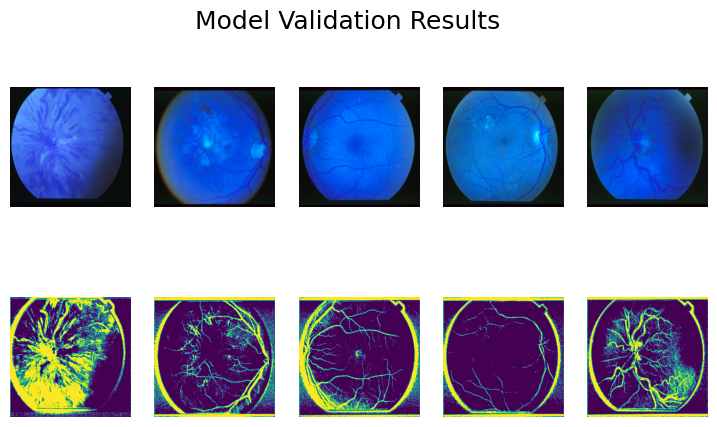

In [14]:
display_results(images,masks,'ImagesVL/')